# Assignment: Linear Models
## Foundations of Machine Learning
## Do Q1 and one other question

In [1]:
# ! git clone https://github.com/imdressel/linearRegression

Cloning into 'linearRegression'...


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression

**Q1.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented



In [7]:
df = pd.read_csv('./data/Q1_clean.csv')
df.head(5)

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt


**1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.**

In [8]:
df.loc[:,['Price','Neighbourhood ']].groupby('Neighbourhood ').describe()

Price                                                      \
                  count        mean         std   min     25%    50%    75%   
Neighbourhood                                                                 
Bronx             217.0   75.276498   39.755468  10.0   50.00   60.0   90.0   
Brooklyn         8487.0  127.747378  106.038466  20.0   75.00  100.0  150.0   
Manhattan       11763.0  183.664286  170.434606  25.0  103.00  150.0  214.0   
Queens           1590.0   96.857233   61.712648  25.0   60.00   80.0  115.0   
Staten Island      96.0  146.166667  508.462029  35.0   54.75   71.0   99.0   

                         
                    max  
Neighbourhood            
Bronx             244.0  
Brooklyn         4500.0  
Manhattan       10000.0  
Queens            950.0  
Staten Island    5000.0

Manhattan is the most expensive bourough on average, with a mean price of $183 per night. The 75% percentile for Manhattan is the highest, at $214 per night, and the maxmimum price in Manhattan is $10,000 per night.

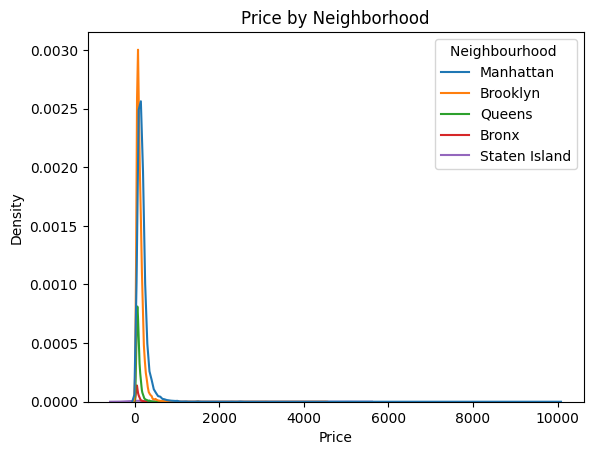

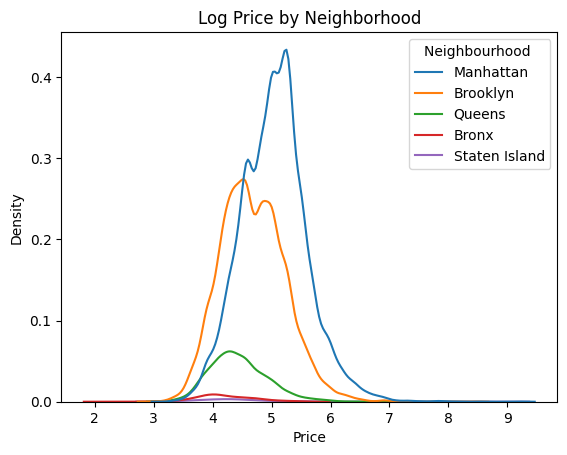

In [9]:
# create kdeplot of price and log price, grouping by neighborhood
sns.kdeplot(x=df['Price'],hue=df['Neighbourhood '])
plt.title("Price by Neighborhood")
plt.show()

# log transform
sns.kdeplot(x=np.log(df['Price']),hue=df['Neighbourhood '])
plt.title("Log Price by Neighborhood")
plt.show()

The pridce distribution for Manhattan is shifted to higher values overall compared to the other neighborhoods

**2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?**

Notes for myself: categorical data often needs to be converted into numerical values for sklean to work. We use pd.get_dummies(varName) to create dummy variables out of each categorical variable. 

In [21]:
y = df['Price']
X = pd.get_dummies(df['Neighbourhood '],dtype='int')
print(X)

       Bronx  Brooklyn  Manhattan  Queens  Staten Island
0          0         0          1       0              0
1          0         1          0       0              0
2          0         0          1       0              0
3          0         1          0       0              0
4          0         0          1       0              0
...      ...       ...        ...     ...            ...
22148      0         0          1       0              0
22149      0         1          0       0              0
22150      0         1          0       0              0
22151      0         1          0       0              0
22152      0         0          1       0              0

[22153 rows x 5 columns]


In [22]:
from sklearn import linear_model

# choosing to drop the intercept of the regression but keep all the dummies
reg = linear_model.LinearRegression(fit_intercept=False).fit(X,y) # run regression
results1 = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient':reg.coef_}) # regression coefficients

results1

,variable,coefficient
0,Bronx,75.276498
1,Brooklyn,127.747378
2,Manhattan,183.664286
3,Queens,96.857233
4,Staten Island,146.166667


We see that the regression coefficients for each neighborhood are the corresponding mean prices. This shows that the regression coefficients of a continuous varibale on one categorical variable are the group averages. [maybe write more here]

**3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?**

In [9]:
y = df['Price']
X = pd.get_dummies(df['Neighbourhood '],dtype='int',drop_first=True) # need to drop the first level so we have k-1 dummies
# avoiding multicolinearity

# leave an intercept in the linear model
reg = linear_model.LinearRegression().fit(X,y)
results2 = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient':reg.coef_}) # regression coefficients

results2

,variable,coefficient
0,Brooklyn,52.470881
1,Manhattan,108.387789
2,Queens,21.580735
3,Staten Island,70.890169


In [10]:
# difference in the coefficients is the interceipt in the linear model
print(results1.coefficient - results2.coefficient)
print(reg.intercept_)

0     22.805617
1     19.359590
2    162.083551
3     25.967064
4           NaN
Name: coefficient, dtype: float64
75.27649769584602


The intercept is the mean price, or coefficient, for the Bronx. This is because the Bronx was the dummy variable that got dropped to become the reference category that the other vairbale coefficients are now relative to. We can get the coefficients from part 2 by adding the mean price for the Bronx (regression intercept) to the current coefficients. 

**4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?**


In [11]:
from sklearn.model_selection import train_test_split

y = df['Price']
X = df.loc[:,['Review Scores Rating','Neighbourhood ']]
X_train, X_test, y_train, y_test = train_test_split(X,y, # feature and target variables
                                                    test_size = 0.2, # split the sample 80 train and 20 test
                                                    random_state = 100) # set the random state so we can replicate later
Z_train = pd.concat([X_train['Review Scores Rating'],
                     pd.get_dummies(X_train['Neighbourhood '], dtype='int')], axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'],
                    pd.get_dummies(X_test['Neighbourhood '], dtype='int')], axis = 1)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) # run regression

y_hat = reg.predict(Z_test)

# print the R^2 and RMSE of the test set
print(f'R^2: {reg.score(Z_test,y_test)}')
rmse = np.sqrt(np.mean((y_test - y_hat)**2))
print(f'RMSE: ', rmse)

# print the coefficients
results = pd.DataFrame({'variable':reg.feature_names_in_,'coefficient':reg.coef_})
results

R^2: 0.06701086106947296
RMSE:  125.01092061382933


,variable,coefficient
0,Review Scores Rating,1.032257
1,Bronx,-17.261392
2,Brooklyn,32.180888
3,Manhattan,89.421020
4,Queens,4.050208
5,Staten Island,61.576393


In [12]:
# find the most expensive property you can rent
# 100*(Review Scores Rating coefficient) + (Manhattan coefficient)
# 100-rated rental
print(100*results['coefficient'][0] + results['coefficient'][3])

192.64670789973755


The most expensive property you can rent is in Mnahattan for $192.65 per night

**5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?**


In [14]:
# code that doesn't work
y = df['Price']
X = df.loc[:,['Review Scores Rating','Neighbourhood ','Property Type']]

# convert to dummy variables before train test split
X = pd.concat([X['Review Scores Rating'],pd.get_dummies(X['Neighbourhood '],dtype='int'), pd.get_dummies(X['Property Type'], dtype='int')],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y, # feature and target variables
                                                    test_size = 0.2, # split the sample 80 train and 20 test
                                                    random_state = 100) # set the random state so we can replicate later

reg = linear_model.LinearRegression(fit_intercept=False).fit(X_train,y_train) # run regression

y_hat = reg.predict(X_test)

# print the R^2 and RMSE of the test set
print(f'R^2: {reg.score(X_test,y_test)}')
rmse = np.sqrt(np.mean((y_test - y_hat)**2))
print(f'RMSE: ', rmse)

# print the coefficients
results = pd.DataFrame({'variable':reg.feature_names_in_,'coefficient':reg.coef_})
results

R^2: 0.07515316986819853
RMSE:  124.46423255231858


,variable,coefficient
0,Review Scores Rating,1.015839e+00
1,Bronx,-2.767276e+01
2,Brooklyn,2.924260e+01
3,Manhattan,9.174987e+01
4,Queens,-3.734207e-01
5,Staten Island,4.482572e+01
6,Apartment,-2.497177e+00
7,Bed & Breakfast,-3.382891e+01
8,Boat,6.445280e+01
9,Bungalow,5.126009e+01


In [19]:
print(f'Coefficient on Review Scores Rating: {results["coefficient"][0]}')

Coefficient on Review Scores Rating: 1.0158393371248404


In [23]:
# most expensive kind of property you can rent?
# 100*Review Scores Rating + Manhattan + Condominium
rsr_coef = results[results['variable'] == 'Review Scores Rating']['coefficient'].values[0]
manhattan_coef = results[results['variable'] == 'Manhattan']['coefficient'].values[0]
condo_coef = results[results['variable'] == 'Condominium']['coefficient'].values[0]

print(rsr_coef)
print(manhattan_coef)
print(condo_coef)

100*rsr_coef + manhattan_coef + condo_coef

1.0158393371248404
91.74987365964007
92.34544042970272


285.6792478018268

The most expensive property to rent is a 100-rated condominium in Manhattan, at $285

**6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.**


Coefficient in part 4: 1.0323
Coefficient in part 5: 1.0158

The coefficient on Review Scores Rating slightly changed from part 4 to part 5. In part 4, we only included review scores rating and neighbourhood, while in parth 5, we included review scores rating, neighbourhood, and property type. This causes some changes in the coefficients because some variation in prices is now being explained by the new variable: property type. This can cause other predictors to be weighted more or less because some of their predictive power may be correlated to property type. This is because multiple regression replies on regressing the y and x variables of interest to all other variables and regressing residuals on each other.

**7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?**

**Q2. This question is a case study for linear models. The data are about car prices. In particular, they include:**

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv 
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  **1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.**

   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

  No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0          1st                 5    diesel      7-Speed         Automatic   
1          1st                 5    petrol      5-Speed            Manual   
2          2nd                 5    petrol      5-Speed            Manual   
3          1st                 5    petrol      5-Speed            Manual   
4          1st                 5    petrol      5-Speed            Manual   

    Price  
0  657000  
1  682000  
2  793000  
3  414000  
4  515000  
Index(['Unnamed: 0', 'Make', 'Ma

<Axes: >

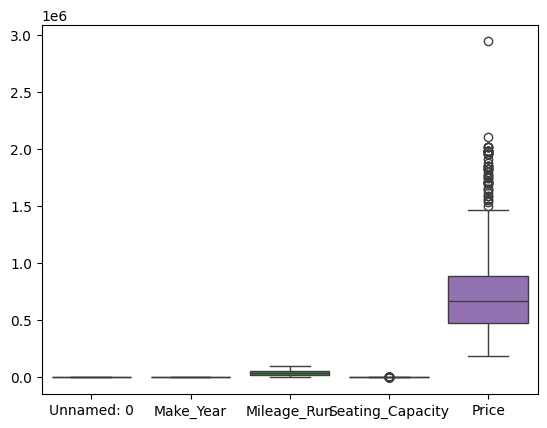

In [3]:
df = pd.read_csv('./data/cars_hw.csv')
print(df.head(5))
print(df.columns)

# create a test dataset to mess around with the data
df_test = df 
df_orig = df

# check for outliers by making boxplot
sns.boxplot(data=df)


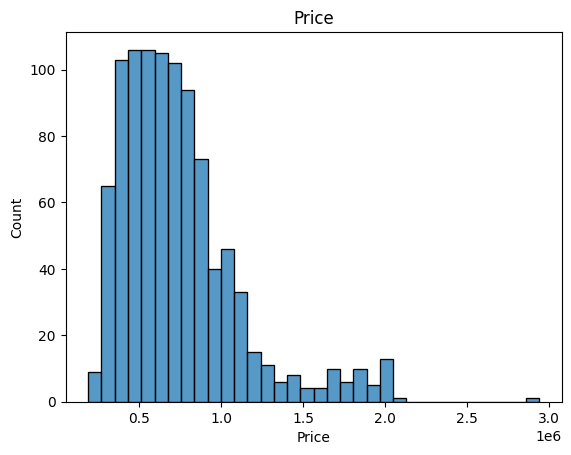

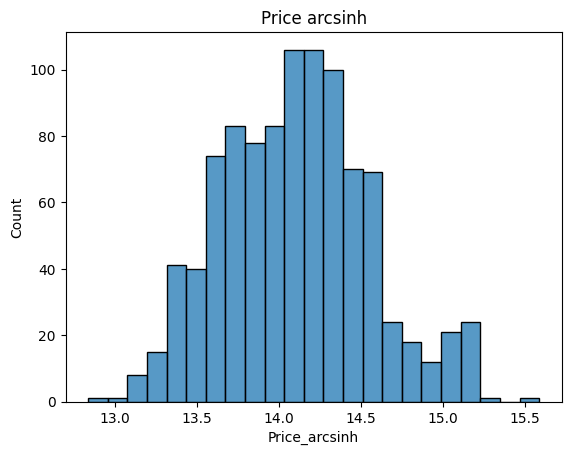

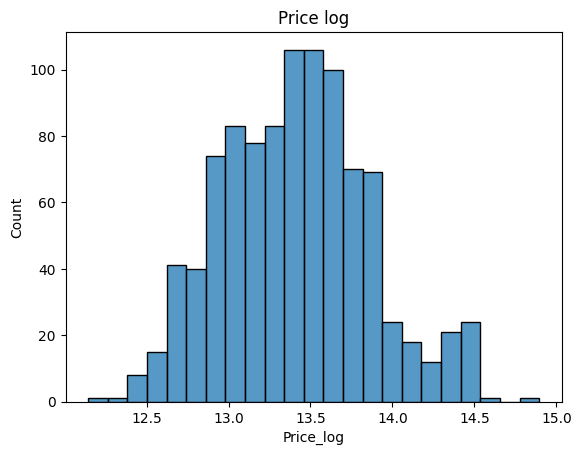

In [4]:
# test different transformations on the data
df_test['Price_arcsinh'] = np.arcsinh(df['Price'])
df_test['Price_log'] = np.log(df['Price'])

sns.histplot(df_test['Price'])
plt.title('Price')
plt.show()
sns.histplot(df_test['Price_arcsinh'])
plt.title('Price arcsinh')
plt.show()
sns.histplot(df_test['Price_log'])
plt.title('Price log')
plt.show()

#  both arcsinh and log transformations look good for price. I am going to go with arcsinh

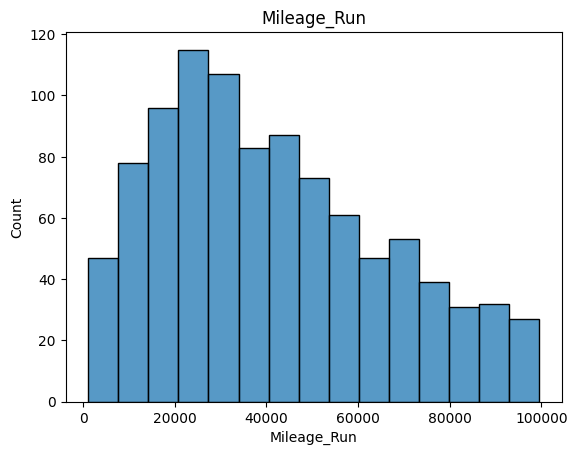

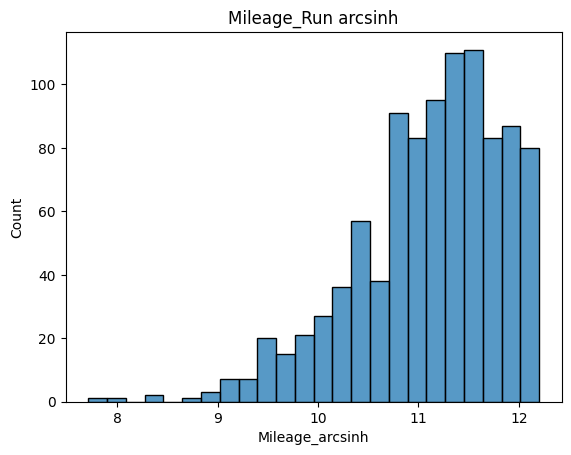

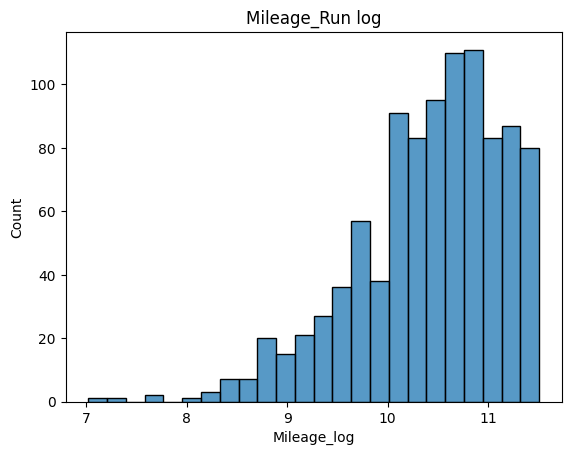

In [5]:
df_test['Mileage_arcsinh'] = np.arcsinh(df['Mileage_Run'])
df_test['Mileage_log'] = np.log(df['Mileage_Run'])

sns.histplot(df_test['Mileage_Run'])
plt.title('Mileage_Run')
plt.show()
sns.histplot(df_test['Mileage_arcsinh'])
plt.title('Mileage_Run arcsinh')
plt.show()
sns.histplot(df_test['Mileage_log'])
plt.title('Mileage_Run log')
plt.show()

In [6]:
# transfrom the variables as needed
df['price_arcsinh'] = np.arcsinh(df['Price'])
df['mileage_arcsinh'] = np.arcsinh(df['Mileage_Run'])
df['age'] = max(df['Make_Year']) - df['Make_Year'] # add the age of the car, remove this if I don't need it

# remove the unnecessary variables (untransformed)
df = df.drop(['Price','Mileage_Run','Make_Year','Unnamed: 0'],axis=1)

<Axes: >

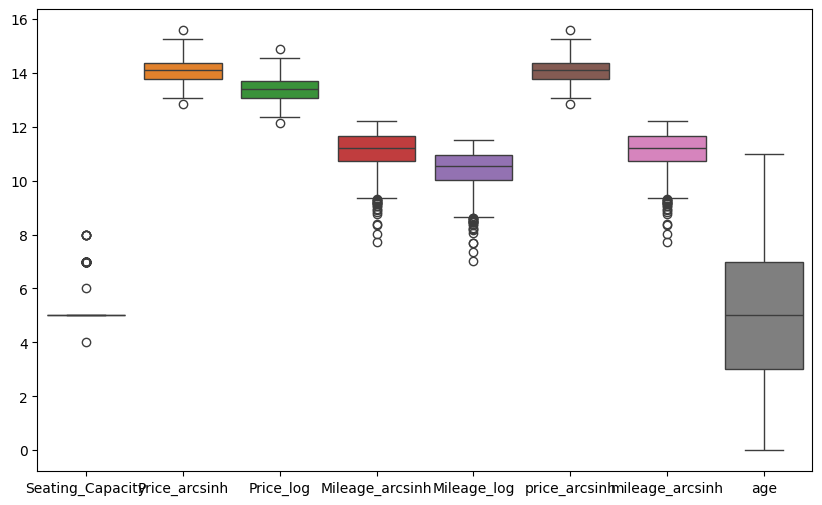

In [7]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(ax=ax, data=df)

**2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?**

with original dataset

In [8]:
df_orig['Price'].groupby(df_orig['Make']).describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,4.535000e+05,2.466064e+05,267000.0,288500.0,345500.0,537500.0,892000.0
Datsun,3.0,2.896667e+05,1.050397e+04,279000.0,284500.0,290000.0,295000.0,300000.0
Ford,52.0,7.211731e+05,1.409277e+05,290000.0,635000.0,707500.0,787000.0,1066000.0
Honda,73.0,7.989726e+05,2.665091e+05,316000.0,581000.0,785000.0,915000.0,1537000.0
Hyundai,305.0,6.918918e+05,2.791597e+05,248000.0,485000.0,638000.0,837000.0,1742000.0
Jeep,4.0,1.499500e+06,1.525134e+05,1290000.0,1447500.0,1529500.0,1581500.0,1649000.0
Kia,8.0,1.614750e+06,1.190567e+05,1369000.0,1579000.0,1628500.0,1705750.0,1741000.0
MG Motors,35.0,1.869457e+06,1.216611e+05,1589000.0,1786500.0,1848000.0,1978000.0,2019000.0
Mahindra,18.0,1.100167e+06,1.755493e+05,796000.0,1037000.0,1094500.0,1157000.0,1465000.0


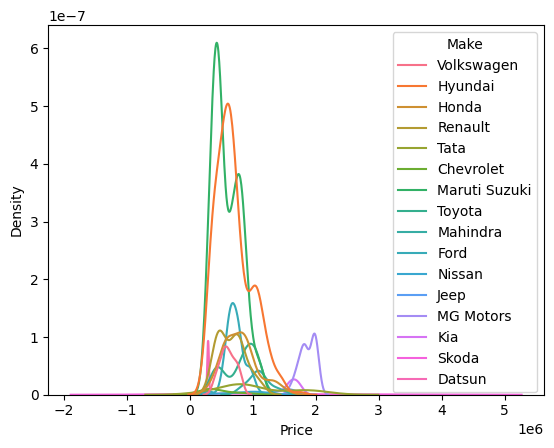

In [9]:
sns.kdeplot(data=df_orig,x='Price',hue='Make')
plt.show()

with transformed dataset

In [10]:
df['Price_arcsinh'].groupby(df['Make']).describe()

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,13.613042,0.480975,13.188151,13.261539,13.445433,13.864828,14.394369
Datsun,3.0,13.269194,0.036311,13.232114,13.251449,13.270783,13.287734,13.304685
Ford,52.0,14.161427,0.210895,13.270783,14.054527,14.162640,14.269131,14.572571
Honda,73.0,14.229465,0.336972,13.356645,13.965653,14.266586,14.419827,14.938490
Hyundai,305.0,14.061658,0.398781,13.114331,13.785051,14.059241,14.330727,15.063692
Jeep,4.0,14.909738,0.105084,14.763300,14.876417,14.933413,14.966733,15.008827
Kia,8.0,14.985324,0.076877,14.822738,14.965389,14.996253,15.042662,15.063117
MG Motors,35.0,15.132199,0.066263,14.971763,15.088892,15.122762,15.190744,15.211260
Mahindra,18.0,14.592100,0.159906,14.280502,14.544955,14.598828,14.654396,14.890513


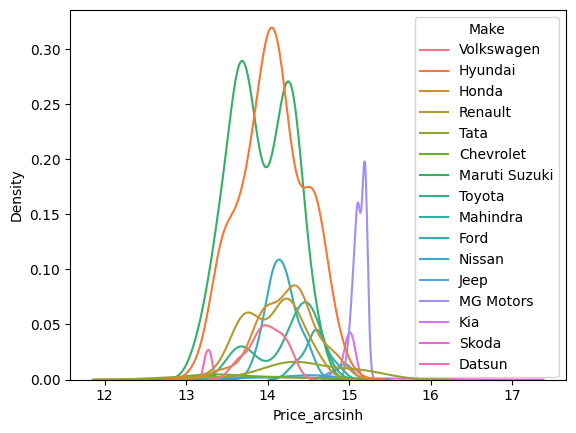

In [11]:
sns.kdeplot(data=df,x='Price_arcsinh',hue='Make')
plt.show()

Which car brands are the most expensive? What do prices look like in general?
- most expensive: MG Moters, then Kia, then Jeep
- prices in general: some strong multimodal peaks, but most have a single peak
distinct multimodal peaks: toyota, mahindra



  **3. Split the data into an 80% training set and a 20% testing set.**


In [13]:
# first, randomize the data in the dataset
N = df.shape[0]
df = df.sample(frac=1, random_state=100) # randomize!
train_size = int(0.8*N)

# How to do the split as needed:
df_train = df[0:train_size]
y_train = df_train['Price_arcsinh']

df_test = df[train_size:]
y_test = df_test['Price_arcsinh']


**4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?**

In [15]:
df.columns
print(df.dtypes)

Make                  object
Color                 object
Body_Type             object
No_of_Owners          object
Seating_Capacity       int64
Fuel_Type             object
Transmission          object
Transmission_Type     object
Price_arcsinh        float64
Price_log            float64
Mileage_arcsinh      float64
Mileage_log          float64
price_arcsinh        float64
mileage_arcsinh      float64
age                    int64
dtype: object


In [16]:
from sklearn import linear_model

#regress price on the numeric variables alone; report R2 and RMSE on the training and test set
num_vars = ['age','Mileage_arcsinh','Seating_Capacity']
X_train_n = df_train.loc[:,num_vars]
reg_n = linear_model.LinearRegression().fit(X_train_n,y_train) 
X_test_n = df_test.loc[:,num_vars]
y_hat = reg_n.predict(X_test_n)
print('Numeric only model R2: ', reg_n.score(X_test_n,y_test)) # R2
rmse_n = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('Numeric only model RMSE: ', rmse_n) # R2

Numeric only Rsq:  0.47500291656763416
Numeric only RMSE:  0.3153065263031319


In [22]:
# Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap)

cat_vars = ['Make','Color','Body_Type','Fuel_Type','Transmission','Transmission_Type']

# using a loop to set dummies
dummies = pd.DataFrame([]) # create empty df
for var in cat_vars: 
    new_dummies = pd.get_dummies( df.loc[:,var], drop_first=True, dtype=int)
    dummies = pd.concat([dummies, new_dummies], axis=1, ignore_index=True) 
    X_train_c = dummies.iloc[0:train_size,:]
    X_test_c = dummies.iloc[train_size:,:]

# now, run regression with the dummy vars
reg_c = linear_model.LinearRegression().fit(X_train_c,y_train) 
y_hat_c = reg_c.predict(X_test_c)
# print the r squared and rmse
print('Categorical only model R2: ', reg_c.score(X_test_c,y_test)) # R2
rmse_c = np.sqrt( np.mean( (y_test - y_hat_c)**2 ))
print('Categorical only model RMSE: ', rmse_c) # RMSE

Categorical only model R2:  0.6328712991859706
Categorical only model RMSE:  0.26367179960539355


The 2nd model performs better on the test set because it has a higher R^2 and lower rmse

In [23]:
# last model that combines all the regressors from the previous two
X_train_combo = pd.concat([X_train_n, X_train_c],axis=1, ignore_index=True)
X_test_combo = pd.concat([X_test_n, X_test_c],axis=1, ignore_index=True)

# run regression
reg_all = linear_model.LinearRegression().fit(X_train_combo,y_train) 
y_hat_all = reg_all.predict(X_test_combo)
print('Both regressor types model R2: ', reg_all.score(X_test_combo,y_test))  # R2
rmse_all = np.sqrt( np.mean( (y_test - y_hat_all)**2 ))
print('Both regressor types model RMSE: ', rmse_all) # RMSE

Both regressor types model R2:  0.802875472188732
Both regressor types model RMSE:  0.19320788554451918


The joint model performs the best, with an R^2 of 0.80 and an RMSE of 0.19. The other models in comparison have an R^2 of 0.48 (numerical) and 0.63 (categorical) and RMSE of 0.32 (numerical) and 0.26 (categorical). By using more variables, we improved the performance of the model. It seems like both the numerical and categorical variables are important for predicting the price.

**5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?**

Demonstrate expansion of numerical variables

In [27]:
from sklearn.preprocessing import PolynomialFeatures

# expand the set of numerical variables in regression in the loop (from 1 to 5 since )
for d in np.arange(1,5):
    expander = PolynomialFeatures(degree=d,include_bias=False)
    
    # Expand variables:
    Z = expander.fit_transform(X_test_n) # the variables are taken from X_test_n (age, Mileage_arcsinh, Seating_Capacity)
    names = expander.get_feature_names_out() # Get the names of these variables
    print(names)

['age' 'Mileage_arcsinh' 'Seating_Capacity']
['age' 'Mileage_arcsinh' 'Seating_Capacity' 'age^2' 'age Mileage_arcsinh'
 'age Seating_Capacity' 'Mileage_arcsinh^2'
 'Mileage_arcsinh Seating_Capacity' 'Seating_Capacity^2']
['age' 'Mileage_arcsinh' 'Seating_Capacity' 'age^2' 'age Mileage_arcsinh'
 'age Seating_Capacity' 'Mileage_arcsinh^2'
 'Mileage_arcsinh Seating_Capacity' 'Seating_Capacity^2' 'age^3'
 'age^2 Mileage_arcsinh' 'age^2 Seating_Capacity' 'age Mileage_arcsinh^2'
 'age Mileage_arcsinh Seating_Capacity' 'age Seating_Capacity^2'
 'Mileage_arcsinh^3' 'Mileage_arcsinh^2 Seating_Capacity'
 'Mileage_arcsinh Seating_Capacity^2' 'Seating_Capacity^3']
['age' 'Mileage_arcsinh' 'Seating_Capacity' 'age^2' 'age Mileage_arcsinh'
 'age Seating_Capacity' 'Mileage_arcsinh^2'
 'Mileage_arcsinh Seating_Capacity' 'Seating_Capacity^2' 'age^3'
 'age^2 Mileage_arcsinh' 'age^2 Seating_Capacity' 'age Mileage_arcsinh^2'
 'age Mileage_arcsinh Seating_Capacity' 'age Seating_Capacity^2'
 'Mileage_arcsinh

In [32]:
# expand the set of numerical variables in regression in the loop (from 1 to 5 since )
for d in np.arange(1,10):
    expander = PolynomialFeatures(degree=d,include_bias=False)
    
    # expand variables for the test set
    Z = expander.fit_transform(X_test_n) # the variables are taken from X_test_n (age, Mileage_arcsinh, Seating_Capacity)
    names = expander.get_feature_names_out() # names of expanded variables
    X_test_d = pd.DataFrame(data=Z, columns=names) # make the expanded dataframe
    # reset the indices so it will concatenate properly
    X_test_d.reset_index(drop=True, inplace=True)
    X_test_c.reset_index(drop=True, inplace=True)
    X_test_all = pd.concat([X_test_d, X_test_c], axis=1, ignore_index=True)

    # expand variables for the training set
    Z = expander.fit_transform(X_train_n)
    names = expander.get_feature_names_out() 
    X_train_d = pd.DataFrame(data=Z, columns=names) 
    # fix the indices
    X_train_d.reset_index(drop=True, inplace=True)
    X_train_c.reset_index(drop=True, inplace=True)
    X_train_all = pd.concat([X_train_d, X_train_c], axis=1, ignore_index=True)

    # run regression
    reg_all = linear_model.LinearRegression().fit(X_train_all,y_train)
    print(d, ' R^2: ', reg_all.score(X_test_all,y_test)) # R2
    y_hat_all = reg_all.predict(X_test_all)
    rmse_all = np.sqrt( np.mean( (y_test - y_hat_all)**2 ))
    print(d, 'RMSE: ', rmse_all) # RMSE


1  R^2:  0.802875472188732
1 RMSE:  0.19320788554451918
2  R^2:  0.7958960342124015
2 RMSE:  0.19659851643200332
3  R^2:  0.7991066849966747
3 RMSE:  0.19504609387035154
4  R^2:  -142723051544749.66
4 RMSE:  5198781.633694204
5  R^2:  -1.9969813040358488
5 RMSE:  0.7533495470333182
6  R^2:  -213.21901301769353
6 RMSE:  6.369179984491218
7  R^2:  -32501271.11720636
7 RMSE:  2480.873925134269
8  R^2:  -31731501.389852203
8 RMSE:  2451.319004284268
9  R^2:  -1079962953997.9532
9 RMSE:  452229.5569552756


As I increase the expansion, the R2  generally decreases and the RMSE increases. The performance is very similar for the first few expansions. The best degree appears to be 1, with an Rsq of 0.80 and an RMSE of 0.193. The Rsq becomes negative for a degree of 4.

This is slightly better than my best model from 4. The RMSE for a degree fo 1 is 0.193 (similar for a degree of 2 at 0.197). The best RMSE from part 4 was 0.202. The R2 are very similar, with 0.80 for degree 1 and 2 and 0.80 for the best model from part 4.

**6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.**

(13.0, 15.0)

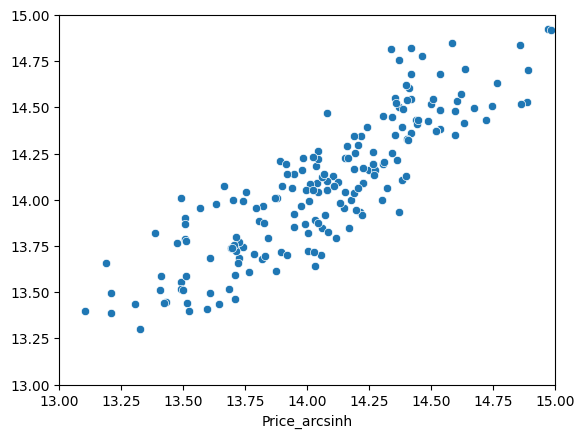

In [39]:
d = 1 # degree 1

expander = PolynomialFeatures(degree=d,include_bias=False)

# expand variables for the test set
Z = expander.fit_transform(X_test_n) # the variables are taken from X_test_n (age, Mileage_arcsinh, Seating_Capacity)
names = expander.get_feature_names_out() # names of expanded variables
X_test_d = pd.DataFrame(data=Z, columns=names) # make the expanded dataframe
# reset the indices so it will concatenate properly
X_test_d.reset_index(drop=True, inplace=True)
X_test_c.reset_index(drop=True, inplace=True)
X_test_all = pd.concat([X_test_d, X_test_c], axis=1, ignore_index=True)

# expand variables for the training set
Z = expander.fit_transform(X_train_n)
names = expander.get_feature_names_out() 
X_train_d = pd.DataFrame(data=Z, columns=names) 
# fix the indices
X_train_d.reset_index(drop=True, inplace=True)
X_train_c.reset_index(drop=True, inplace=True)
X_train_all = pd.concat([X_train_d, X_train_c], axis=1, ignore_index=True)

# run regression
reg_all = linear_model.LinearRegression().fit(X_train_all,y_train)

y_hat_all = reg_all.predict(X_test_all) # predictions
residuals = y_test - y_hat_all # calculate residuals

# Scatterplot:
sns.scatterplot(x=y_test,y=y_hat_all)
plt.xlim([13,15])
plt.ylim([13,15])


The predicted and true values roughly line up along the diagonal

<Axes: xlabel='Price_arcsinh', ylabel='Density'>

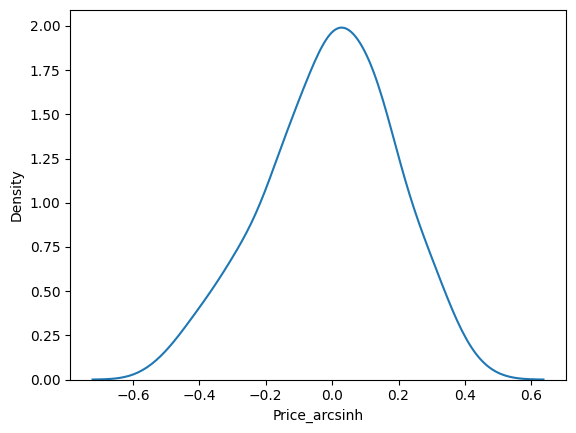

In [35]:
# plot the residuals
sns.kdeplot(residuals)

The residuals have a bell-shaped distribution that is symmetric around zero.

Strengths and weaknesses: The model seems quite effective, with a low RMSE and high R2. The predicted vs true values roughly line up along the diagonal. The residuals have a normal distribution. The model could have a higher R2

**Q3. This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)**

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

**1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.**


In [2]:
df = pd.read_csv('./data/pretrial_data.csv')
df.head(5)

,Unnamed: 0,case_type,age,sex,race,is_poor,bond,bond_type,prior_F,prior_M,gini,released,sentence_type,sentence,bond_NA,held_wo_bail,sentence_NA
0,0,F,31.0,M,W,NaN,NaN,7,0.0,0.0,0.44,NaN,NaN,NaN,True,False,True
1,1,F,60.0,M,B,NaN,NaN,7,13.0,21.0,0.44,0.0,0.0,60.000000,True,False,False
2,2,M,27.0,M,W,NaN,NaN,7,0.0,0.0,0.44,0.0,1.0,12.000000,True,False,False
3,3,M,27.0,M,B,0.0,NaN,7,0.0,9.0,0.44,0.0,1.0,0.985626,True,False,False
4,4,F,28.0,F,W,0.0,NaN,7,0.0,0.0,0.44,1.0,4.0,0.000000,True,False,True


In [3]:
df = pd.read_csv('./data/pretrial_data.csv')
print(df.head())

df['held'] = df['held_wo_bail'].astype(int)
df['sex'] = df['sex'].replace(['M','F'],['Male','Female'])
df['Black'] = (df['race']=='B').astype(int)
rdf = df.loc[:,['held','Black','sex','case_type','is_poor','prior_F']]
rdf = rdf.dropna()
rdf['held'].value_counts()



   Unnamed: 0 case_type   age sex race  is_poor  bond  bond_type  prior_F  \
0           0         F  31.0   M    W      NaN   NaN          7      0.0   
1           1         F  60.0   M    B      NaN   NaN          7     13.0   
2           2         M  27.0   M    W      NaN   NaN          7      0.0   
3           3         M  27.0   M    B      0.0   NaN          7      0.0   
4           4         F  28.0   F    W      0.0   NaN          7      0.0   

   prior_M  gini  released  sentence_type   sentence  bond_NA  held_wo_bail  \
0      0.0  0.44       NaN            NaN        NaN     True         False   
1     21.0  0.44       0.0            0.0  60.000000     True         False   
2      0.0  0.44       0.0            1.0  12.000000     True         False   
3      9.0  0.44       0.0            1.0   0.985626     True         False   
4      0.0  0.44       1.0            4.0   0.000000     True         False   

   sentence_NA  
0         True  
1        False  
2        Fa

held
0    15844
1     5710
Name: count, dtype: int64

In [4]:
# narrow down to relevant variables before dropping NaNs or imputing missing values
df_use = df.loc[:,['held_wo_bail','race','sex','is_poor','prior_F','case_type']]
# change variable types
df_use['held'] = df_use['held_wo_bail'].astype(int)

df_use = df_use.dropna()

# rename columns to match part 4 (held_wo_bail to held)
# df_use['held'] = df_use['held_wo_bail'].astype(int) # convert to int, true = 1, false = 0
df_use = df_use.drop(columns='held_wo_bail')
print(df_use.head())
print(df_use['held'].value_counts())

  race     sex  is_poor  prior_F case_type  held
3    B    Male      0.0      0.0         M     0
4    W  Female      0.0      0.0         F     0
5    B    Male      0.0      1.0         M     0
6    B  Female      1.0      0.0         F     0
7    B    Male      0.0      0.0         M     0
held
0    15712
1     5703
Name: count, dtype: int64


**2. Create a dummy variable indicating that the defendant is Black.**


In [25]:
df_use['Black'] = (df_use['race']=='B').astype(int)
df_use = df_use.dropna()
print(df_use['held'].value_counts())

held
0    15712
1     5703
Name: count, dtype: int64


**3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?**


In [26]:
from sklearn import linear_model

y = df_use['held']
X = pd.get_dummies(df_use['Black'],dtype='int',drop_first=True)
# reg = linear_model.LinearRegression().fit(X,y)

# results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient':reg.coef_})

reg = linear_model.LinearRegression(fit_intercept=False).fit(X,y) # run regression
results1 = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient':reg.coef_}) # regression coefficients

AttributeError: 'LinearRegression' object has no attribute 'feature_names_in_'

**4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:**
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
**What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.**


**5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.**


**6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.**

**Q4.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{alignat*}{3}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{alignat*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{alignat*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

which can be written in terms of sample covariance and sample variance as:

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{alignat*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)

**Q5.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?